In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [4]:
from pandas import read_csv

#import datasets
data= read_csv(r"C:\Users\tavakolsam\Desktop\PHD THESIS\Forest Vegetation Classification Paper\Data and initial drafts/forest_dataset_whole.csv")
data.shape

(581012, 12)

In [5]:
data.describe()

,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,Horizontal_Distance_To_Roadways,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,223.318716,142.528263,1980.291226,2.114462,24.572525,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,19.768697,38.274529,1324.195210,1.061295,9.042951,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,213.000000,119.000000,1024.000000,1.000000,20.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,226.000000,143.000000,1710.000000,2.000000,29.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,237.000000,168.000000,2550.000000,3.000000,31.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,7173.000000,4.000000,40.000000,7.000000


In [6]:
data.groupby("Cover_Type").describe()

elevation                                                    \
               count         mean         std     min      25%     50%   
Cover_Type                                                               
1           211840.0  3128.644888  157.805543  2466.0  3033.00  3146.0   
2           283301.0  2920.936061  186.579366  2142.0  2794.00  2935.0   
3            35754.0  2394.509845  196.732427  1859.0  2260.25  2404.0   
4             2747.0  2223.939934  102.524587  1988.0  2142.00  2231.0   
5             9493.0  2787.417571   96.594047  2482.0  2732.00  2796.0   
6            17367.0  2419.181897  188.762292  1863.0  2320.00  2428.0   
7            20510.0  3361.928669  106.915301  2868.0  3299.25  3363.0   

                              aspect              ... Wilderness_Area       \
               75%     max     count        mean  ...             75%  max   
Cover_Type                                        ...                        
1           3235.0  3686.0  211840.0  156.138227  ...             3.0  3.0   
2           3042.0  3433.0  283301.0  152.060515  ...             3.0  4.0   
3           2549.0  2899.0   35754.0  176.372490  ...             4.0  4.0   
4           2304.0  2526.0    2747.0  137.139425  ...             4.0  4.0   
5           2857.0  3011.0    9493.0  139.283051  ...             3.0  3.0   
6           2544.0  2900.0   17367.0  180.539068  ...             4.0  4.0   
7           3409.0  3858.0   20510.0  153.236226  ...             3.0  3.0   

           Soil_Type                                                    
               count       mean       std  min   25%   50%   75%   max  
Cover_Type                                                              
1           211840.0  27.752091  6.144429  7.0  23.0  29.0  32.0  40.0  
2           283301.0  24.421230  8.231026  7.0  18.0  29.0  31.0  40.0  
3            35754.0   8.401046  2.325981  7.0   7.0   7.0  10.0  33.0  
4             2747.0   9.443393  3.886872  7.0   7.0   7.0  10.0  17.0  
5             9493.0  22.020225  8.994158  7.0  13.0  24.0  30.0  34.0  
6            17367.0  11.110267  5.655408  7.0   7.0  10.0  10.0  34.0  
7            20510.0  36.619600  4.681926  7.0  37.0  38.0  39.0  40.0  

[7 rows x 88 columns]

In [7]:
#reversing one_hot_encoding for soil type


def split_numbers_chars(row):
    '''This function fetches the numerical characters at the end of a string
    and returns alphabetical character and numerical chaarcters respectively'''
    head = row.rstrip('0123456789')
    tail = row[len(head):]
    return head, tail

def reverse_one_hot_encode(dataframe, start_loc, end_loc, numeric_column_name):
    ''' this function takes the start and end location of the one-hot-encoded column set and numeric column name to be created as arguments
    1) transforms one-hot-encoded columns into one column consisting of column names with string data type
    2) splits string column into the alphabetical and numerical characters
    3) fetches numerical character and creates numeric column in the given dataframe
    '''
    dataframe['String_Column'] = (dataframe.iloc[:, start_loc:end_loc] == 1).idxmax(1)
    dataframe['Tuple_Column'] = dataframe['String_Column'].apply(split_numbers_chars)
    dataframe[numeric_column_name] = dataframe['Tuple_Column'].apply(lambda x: x[1]).astype('int64')
    dataframe.drop(columns=['String_Column','Tuple_Column'], inplace=True)

In [8]:
reverse_one_hot_encode(data, 16, 50, "Soil_Type")

ValueError: attempt to get argmax of an empty sequence

In [ ]:
data.to_excel("forest_data_whole_dataset.xlsx")

In [5]:
def outlier_function(df, col_name):
    ''' this function detects first and third quartile and interquartile range for a given column of a dataframe
    then calculates upper and lower limits to determine outliers conservatively
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [6]:
# loop through all columns to see if there are any outliers
for column in data.columns:
    if outlier_function(data, column)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(data, column)[2], column))

There are 275 outliers in  slope
There are 414 outliers in  horizontal_distance_to_hydrology
There are 5339 outliers in vertical_distance_to_hydrology
There are 1191 outliers in  Hillshade_Noon
There are 10 outliers in  Horizontal_Distance_To_Fire_Points
There are 37877 outliers in Cover_Type


In [ ]:
plt.boxplot(data);

In [6]:
#elimination of outliers based on 

data = data[(data['vertical_distance_to_hydrology'] > outlier_function(data, 'vertical_distance_to_hydrology')[0]) &
              (data['vertical_distance_to_hydrology'] < outlier_function(data, 'vertical_distance_to_hydrology')[1])]
data.shape

KeyError: 'vertical_distance_to_hydrology'

In [24]:
data.to_excel("forest_data_outlierseliminated.xlsx")

In [13]:
X=data.iloc[:,0:10]
Y=data.iloc[:,10]
Y

0         2
1         2
2         2
3         2
4         2
         ..
575571    0
575572    0
575573    0
575574    0
575575    0
Name: Cover_Type, Length: 575576, dtype: int64

In [ ]:
#under sampling the dataset

from imblearn.datasets import make_imbalance
x, y = make_imbalance(X, Y, sampling_strategy={1: 3100, 2: 3600, 3: 3000, 4:2700, 5:2700, 6:3000, 7:2700}, random_state=42)

In [ ]:
x.to_excel("x-.xlsx")
y.to_excel("y-.xlsx")

In [ ]:
#pairgrid plotting 

import seaborn as sns
g = sns.PairGrid(x, hue="Cover_Type")
g.map_diag(sns.histplot,alpha=0.1)
g.map_lower(sns.scatterplot,alpha=0.8)
g.add_legend()

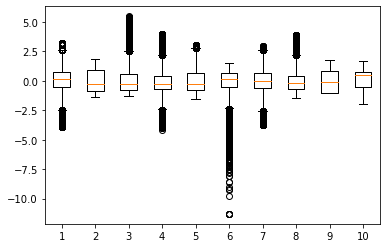

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

scaler=StandardScaler()
X1=scaler.fit_transform(X)
plt.boxplot(X1);

In [15]:
from sklearn.model_selection import train_test_split
xtrain , xtest, ytrain, ytest=train_test_split(X,Y,test_size=0.3,random_state=42)
#data shape
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(402903, 10) (172673, 10) (402903,) (172673,)
